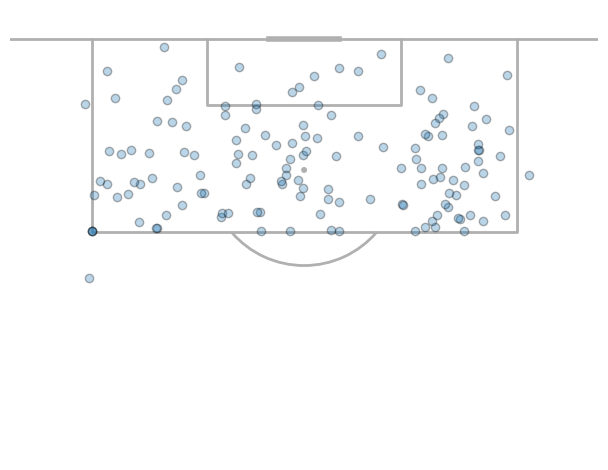

In [1]:
from mplsoccer import VerticalPitch
import pandas as pd
df = pd.read_parquet('opta_events_112_2022.parquet')
df_pen_award = (df[(df.penalty) & (df['type_name'] == 'foul') & (df['duel_events_defensive'].isnull())]
                .dropna(how='all', axis='columns')
                .copy()
               )
p = VerticalPitch(pitch_type='opta', half=True, pad_left=-10, pad_right=-10, pad_bottom=-20)
fig, ax = p.draw()
p.scatter(df_pen_award.x, df_pen_award.y, ax=ax, alpha=0.3, ec='black')
fig.savefig('good_padding.png')

In [2]:
from mplsoccer import Standardizer
uefa_to_opta = Standardizer(pitch_from='uefa', pitch_to='opta')
uefa_to_opta.transform([105, 105], [68/2 - 15, 68/2 + 15])

(array([100., 100.]), array([28.46472727, 71.53527273]))

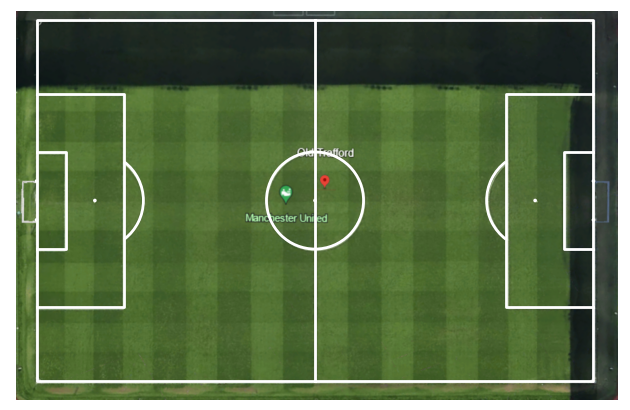

In [3]:
from mplsoccer import add_image, Pitch
import matplotlib.pyplot as plt
hp = Pitch(pad_left=5, pad_bottom=2, pad_top=2, pad_right=5, pitch_type='uefa', line_zorder=2, pitch_color='None', line_color='white', linewidth=2, goal_type='circle')
fig, ax = hp.draw()
image = plt.imread('old_trafford_google_earth.png')
ax_image = add_image(image, fig, left=0.033, bottom=-0.01, width=0.94, height=1, alpha=1)
ax_image.set_zorder(1)
ax.set_zorder(2)

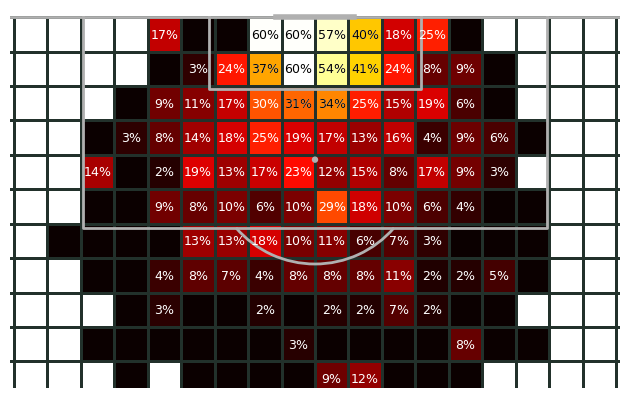

In [4]:
from mplsoccer import VerticalPitch
import pandas as pd
import numpy as np
df = pd.read_parquet('opta_events_112_2022.parquet')
df_shots = df.loc[((df['type_name'].isin(['miss', 'post', 'attempt_saved', 'goal'])) & 
                   (df['set_piece'].isnull()) &
                   (df['shot_throw_in_set_piece'].isnull()) &
                   (df['free_kick'].isnull()) &
                   (df['kick_off'].isnull()) &
                   (df['own_goal'].isnull()) &
                   (df['penalty'].isnull()) &
                   (df['shot_from_corner'].isnull())
                  )].copy()
df_shots['goal'] = df_shots['type_name'] == 'goal'
vp = VerticalPitch(pitch_type='opta', line_zorder=2, half=True,
                   pad_left=-12, pad_right=-12, pad_bottom=-31, pad_top=1)
fig, ax = vp.draw()
bs = vp.bin_statistic(df_shots['x'], df_shots['y'], df_shots['goal'], statistic='mean',
                      bins=(36, 24)
                     )
bs_count = vp.bin_statistic(df_shots['x'], df_shots['y'],
                            bins=(36, 24),
                           )
bs['statistic'][bs_count['statistic'] < 5] = np.nan
hm = vp.heatmap(bs, ax=ax, cmap='hot', edgecolors='#22312b')
hm_labels = vp.label_heatmap(bs, ax=ax, exclude_zeros=True, str_format='{:.0%}',
                             color='white', va='center', ha='center',
                             exclude_nan=True, fontsize=9)
bs['statistic'][bs['statistic'] < 0.3] = np.nan
hm_labels = vp.label_heatmap(bs, ax=ax, exclude_zeros=True,
                             str_format='{:.0%}', color='black', va='center', ha='center', exclude_nan=True,
                             fontsize=9)
fig.savefig('shot_heatmap.png')